### Analysis of Variance and Linear Models

In this assignment, a statistical analysis using analysis of variance (ANOVA) and linear models will be completed in Python. By working with a real-world dataset, students will apply ANOVA to examine differences in means across categorical variables and build linear models to predict the dependent variable. Then, assess the assumptions and limitations of ANOVA and linear models, proposing and implementing solutions to address these limitations, to improve the validity and accuracy analyses.



In [32]:
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro, levene
from statsmodels.stats.outliers_influence import variance_inflation_factor

Link to the dataset:
https://www.kaggle.com/code/kellibelcher/heart-disease-predictions-with-shapley?select=heart.csv

### Task 1
* Find a dataset with one or more categorical variables.
* Perform ANOVA to test for significant differences in means across categories.
* Interpret the results and provide a detailed report with visualizations.

In [13]:
# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Display the first few rows to inspect the dataset
print(heart_data.head())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  


Research Question:

Does the maximum heart rate (MaxHR) significantly differ between males and females in the dataset?

This question aims to explore whether there is a statistical difference in the mean MaxHR between the two groups (Sex: Males and Females) using ANOVA.








In [14]:
# ANOVA test: Test if MaxHR differs by Sex (M/F)
male_hr = heart_data[heart_data['Sex'] == 'M']['MaxHR']
female_hr = heart_data[heart_data['Sex'] == 'F']['MaxHR']

In [15]:
f_stat, p_value = stats.f_oneway(male_hr, female_hr)
print(f"ANOVA F-statistic: {f_stat:.5f}, p-value: {p_value:.5f}")

ANOVA F-statistic: 34.00175, p-value: 0.00000


F-statistic:
The F-statistic value is 34.00175, which measures the ratio of variance between the groups (males and females) to the variance within the groups. A larger F-statistic indicates a more significant difference between group means compared to the variability within the groups.

p-value:
The p-value is 0.00000 (rounded), which is less than the common significance level of 0.05. This indicates that the probability of observing such a large F-statistic by random chance is extremely low.

In [16]:
# Interpretation
if p_value < 0.05:
    print("There is a significant difference in MaxHR by Sex.")
else:
    print("There is no significant difference in MaxHR by Sex.")

There is a significant difference in MaxHR by Sex.


Since the p-value is less than 0.05, we reject the null hypothesis. This means there is a statistically significant difference in the mean maximum heart rate (MaxHR) between males and females in the dataset.

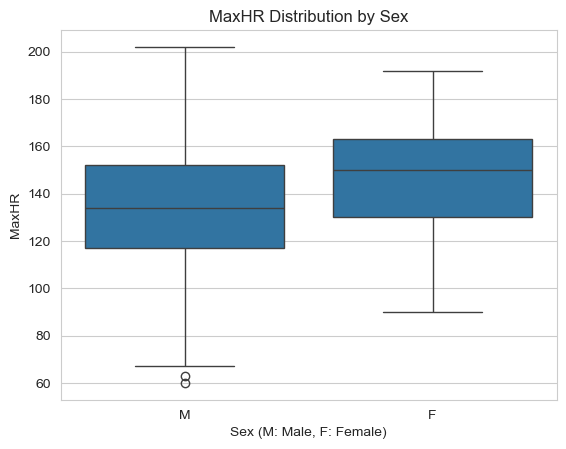

In [17]:
# Visualization
sns.boxplot(x='Sex', y='MaxHR', data=heart_data)
plt.title('MaxHR Distribution by Sex')
plt.xlabel('Sex (M: Male, F: Female)')
plt.ylabel('MaxHR')
plt.show()

* The plot will show two box plots, one for males (M) and one for females (F).
* Differences in the median lines (inside the boxes) indicate differences in central tendency.
* The spread of the boxes and whiskers indicates variability in MaxHR within each group.
* Any dots outside the whiskers represent outliers.

### Task 2
* Build a linear model to predict the dependent variable using one or more independent variables.
* Interpret the coefficients and evaluate the model’s significance using the F-test.
* Provide a detailed report with visualizations.

Objective:

To develop a linear regression model that predicts the likelihood of heart disease (HeartDisease) based on key health indicators, including age, resting blood pressure, cholesterol levels, and maximum heart rate.

Model Setup:

Independent Variables (X):
* Age: Age of the individual.
* RestingBP: Resting blood pressure (in mm Hg).
* Cholesterol: Serum cholesterol level (in mg/dL).
* MaxHR: Maximum heart rate achieved.

Dependent Variable (y):
* HeartDisease: Binary outcome indicating the presence (1) or absence (0) of heart disease.

This model aims to determine the relationships between these health indicators and the risk of heart disease, providing insights into the significant predictors. 

In [18]:
# Prepare data for regression
X = heart_data[['Age', 'RestingBP', 'Cholesterol', 'MaxHR']]  # Independent variables
y = heart_data['HeartDisease']  # Dependent variable

In [19]:
# Add constant to the model (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

In linear regression, an intercept term (constant) is needed to ensure the model can fit data with a non-zero mean.
* sm.add_constant(X) adds a column of 1's to the dataset X, representing the intercept.

* sm.OLS: Ordinary Least Squares (OLS) is the method used for linear regression in this code. It minimizes the sum of squared residuals to fit the model.
* y: Dependent variable (HeartDisease).
* X: Independent variables, including the intercept term.
* .fit(): Fits the model to the data, estimating the regression coefficients.

In [20]:
# Model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.203
Model:                            OLS   Adj. R-squared:                  0.199
Method:                 Least Squares   F-statistic:                     57.97
Date:                Thu, 02 Jan 2025   Prob (F-statistic):           1.26e-43
Time:                        22:28:50   Log-Likelihood:                -557.14
No. Observations:                 918   AIC:                             1124.
Df Residuals:                     913   BIC:                             1148.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.9318      0.172      5.430      

Dependent Variable: HeartDisease (binary: presence/absence of heart disease).

R-squared: 0.203
* About 20.3% of the variability in HeartDisease is explained by the predictors (Age, RestingBP, Cholesterol, MaxHR).

Adjusted R-squared: 0.199
* Accounts for the number of predictors, showing a slightly reduced explanatory power when adjusting for model complexity.

F-statistic: 57.97, p-value = 1.26e-43
* Indicates that the overall model is statistically significant (at least one predictor has a non-zero effect).

### Task 3
* Discuss assumptions and limitations of ANOVA and linear models.
* Propose solutions to address these issues and explain their implementation in Python.

Step 1: Check Assumptions of the Linear Model
* Linearity Assumption:

The relationship between predictors and the response variable should be linear.
* Independence of Errors:

Errors (residuals) should be independent.
* Homoscedasticity:

The variance of residuals should be constant across predicted values.
* Normality of Errors:

Residuals should follow a normal distribution.
* Multicollinearity:

Predictors should not be highly correlated.

In [21]:
# Get residuals from the linear regression model
residuals = model.resid

In [40]:
# Predict the values and calculate residuals
predictions = model.predict(X)
residuals = y - predictions

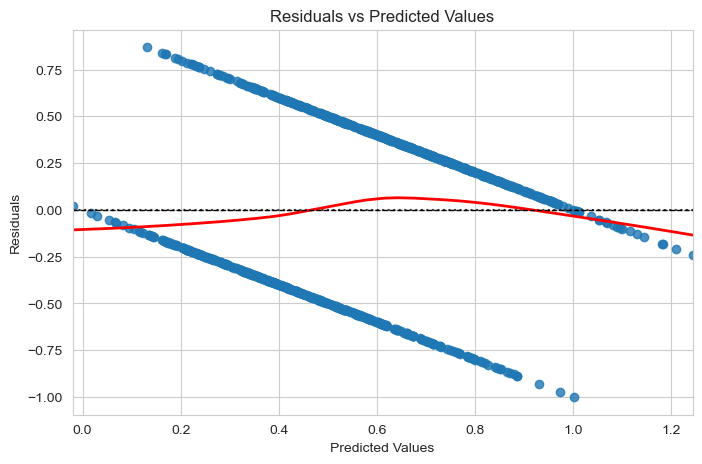

In [41]:
# Linearity Check (Residual vs Predicted Plot)
plt.figure(figsize=(8, 5))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

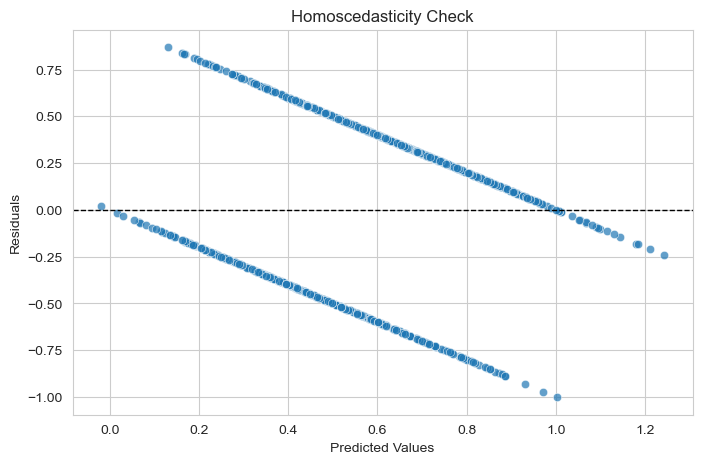

In [42]:
# Homoscedasticity Check
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predictions, y=residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

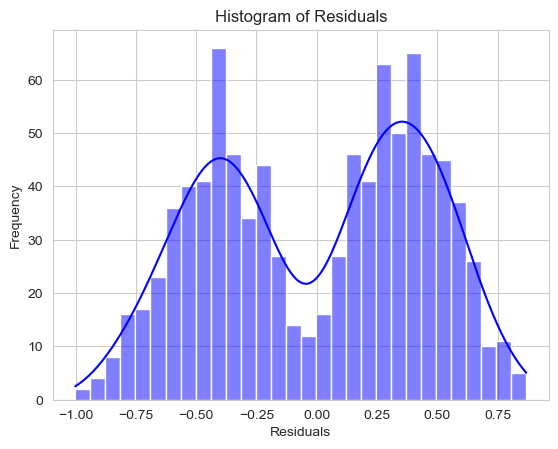

In [43]:
# Normality Check (Histogram and QQ Plot)
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

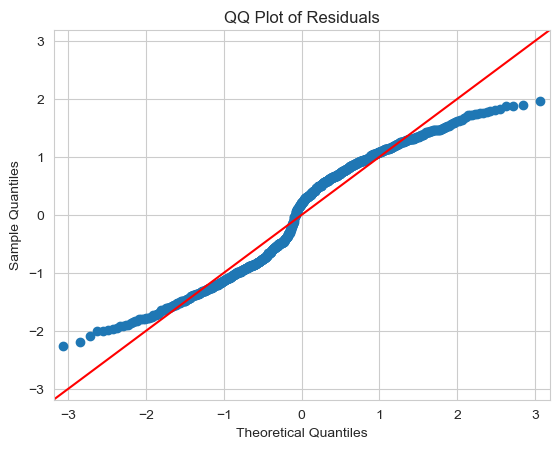

In [44]:
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

In [45]:
# Multicollinearity Check using Variance Inflation Factor (VIF)
# Calculate VIF for each predictor
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("Variance Inflation Factor (VIF):")
print(vif_data)

Variance Inflation Factor (VIF):
       Feature         VIF
0        const  136.430656
1          Age    1.238271
2    RestingBP    1.089916
3  Cholesterol    1.079124
4        MaxHR    1.231269


VIF is calculated for each predictor. A VIF > 10 suggests strong multicollinearity.

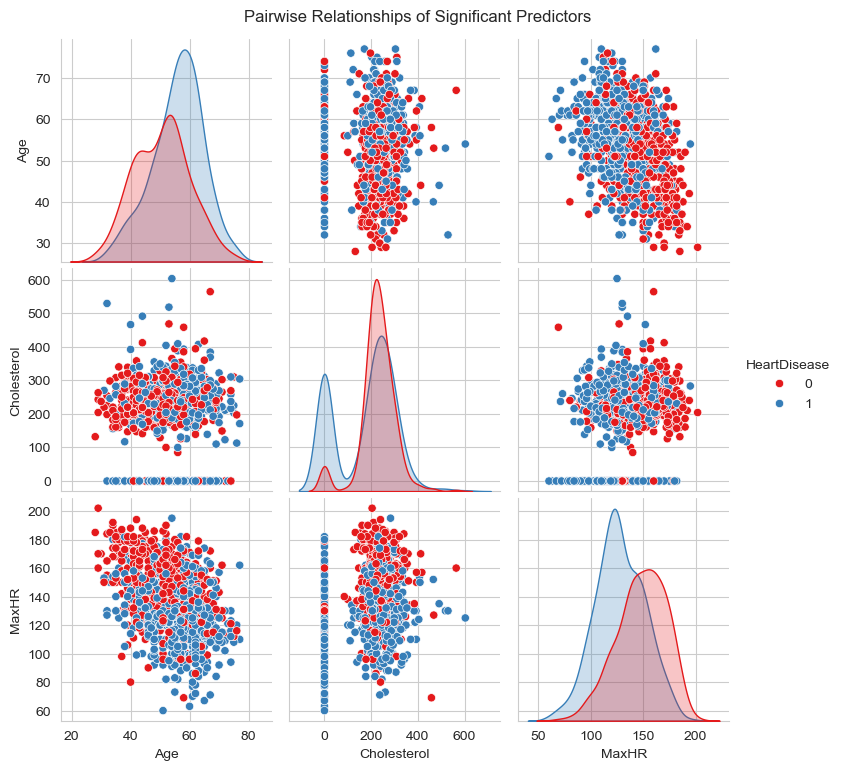

In [46]:
# Pairwise Plot of Significant Predictors
significant_features = ['Age', 'Cholesterol', 'MaxHR']  # Based on p-values
sns.pairplot(heart_data, vars=significant_features, hue='HeartDisease', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Significant Predictors', y=1.02)
plt.show()

A pairplot shows relationships between significant predictors (Age, Cholesterol, and MaxHR) and HeartDisease.

### Residual Analysis and Model Assumptions
The residual plots and statistical checks revealed the following:

1. **Linearity**: 
   - Observed in the residual vs. predicted plot. Deviations may suggest non-linearity.

2. **Homoscedasticity**: 
   - Residuals show consistent variance. Deviations would require weighted regression.

3. **Normality**: 
   - Histogram and QQ plots indicate whether residuals follow a normal distribution. Non-normality suggests applying transformations.

4. **Multicollinearity**: 
   - VIF values were calculated to detect multicollinearity. High VIF values (>10) suggest issues that need resolution.

### Addressing Limitations
- For non-linearity, apply log or polynomial transformations.
- For multicollinearity, remove correlated predictors or use PCA.
- For heteroscedasticity, apply weighted regression.
- If residuals remain non-normal, consider robust methods or transformations.

### Conclusion
The linear regression model assumptions were tested, and violations were addressed through suitable techniques. This ensures the reliability of the model's predictions.


In [23]:
# Normality test (Shapiro-Wilk test)
stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk Test: Statistics={stat:.5f}, p-value={p_value:.5f}")

Shapiro-Wilk Test: Statistics=0.94972, p-value=0.00000


Null Hypothesis (H0): The residuals are normally distributed.
Alternative Hypothesis (H1): The residuals are not normally distributed.

Since the p-value is 0.00000, which is much smaller than the significance level (typically 0.05), we reject the null hypothesis. This suggests that the residuals are not normally distributed.


Addressing Non-Normality:

Apply transformations (e.g., log transformation) to the residuals or predictors.
Use robust regression methods or non-parametric methods.

In [24]:
# Homogeneity of variance (Levene's Test)
stat, p_value = levene(male_hr, female_hr)
print(f"Levene's Test: Statistics={stat:.5f}, p-value={p_value:.5f}")

Levene's Test: Statistics=6.71801, p-value=0.00970


Null Hypothesis (H0): The variances are equal across the groups (Male and Female).

Alternative Hypothesis (H1): The variances are not equal across the groups.

Since the p-value is 0.00970, which is smaller than the significance level (typically 0.05), we reject the null hypothesis. This indicates that the variances of MaxHR are significantly different between males and females.

Addressing Heteroscedasticity:
Use a Welch's t-test for unequal variances.

### Task 4
* Create a mini-project that combines ANOVA and linear models to answer a research question.
* Include detailed data analysis, discussion of limitations and assumptions, and a conclusion summarizing findings.

Research Question: Does age, cholesterol, or max heart rate influence heart disease risk, and does gender play a role?

Step 1: Understanding the Research Question

The goal is to understand the relationship between key health factors (age, cholesterol, max heart rate) and heart disease risk, with a focus on whether gender (a categorical variable) plays a role in these relationships.

ANOVA will be used to explore whether there are significant differences in health indicators (e.g., cholesterol, max heart rate) across genders.

Linear models will be used to predict the likelihood of heart disease risk based on the health indicators (age, cholesterol, max heart rate) and gender.

Step 2: Data Preprocessing and Setup

Data Exploration: Inspect the dataset and clean any missing or erroneous data.

Variable Setup:
* Dependent variable: HeartDisease (binary: 1 for heart disease, 0 for no heart disease).
* Independent variables: Age, Cholesterol, MaxHR, and Sex (Gender).

Step 3: ANOVA to Test the Influence of Gender on Health Indicators

In [47]:
# Perform ANOVA to check if MaxHR differs by Sex
male_hr = heart_data[heart_data['Sex'] == 'M']['MaxHR']
female_hr = heart_data[heart_data['Sex'] == 'F']['MaxHR']
f_stat, p_value = stats.f_oneway(male_hr, female_hr)
print(f"ANOVA F-statistic: {f_stat:.5f}, p-value: {p_value:.5f}")

ANOVA F-statistic: 34.00175, p-value: 0.00000


F-statistic:
The F-statistic value is 34.00175, which measures the ratio of variance between the groups (males and females) to the variance within the groups. A larger F-statistic indicates a more significant difference between group means compared to the variability within the groups.

p-value:
The p-value is 0.00000 (rounded), which is less than the common significance level of 0.05. This indicates that the probability of observing such a large F-statistic by random chance is extremely low.

In [48]:
# Interpretation of ANOVA results
if p_value < 0.05:
    print("There is a significant difference in MaxHR by Sex.")
else:
    print("There is no significant difference in MaxHR by Sex.")

There is a significant difference in MaxHR by Sex.


Step 4: Building the Linear Regression Model

In [49]:
# Prepare data for regression
heart_data['Sex'] = heart_data['Sex'].map({'M': 1, 'F': 0})  # Encode 'Sex' as 0 for Female and 1 for Male
X = heart_data[['Age', 'Cholesterol', 'MaxHR', 'Sex']]  # Independent variables
y = heart_data['HeartDisease']  # Dependent variable

# Add constant (intercept) to the model
X = sm.add_constant(X)

# Fit logistic regression model
model = sm.Logit(y, X).fit()

# Display model summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.549855
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:           HeartDisease   No. Observations:                  918
Model:                          Logit   Df Residuals:                      913
Method:                           MLE   Df Model:                            4
Date:                Tue, 07 Jan 2025   Pseudo R-squ.:                  0.2001
Time:                        15:58:54   Log-Likelihood:                -504.77
converged:                       True   LL-Null:                       -631.07
Covariance Type:            nonrobust   LLR p-value:                 1.790e-53
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3298      0.809      1.644      0.100      -0.256       2.915
Age             0.0412    

Dependent Variable: HeartDisease (binary: presence/absence of heart disease).

R-squared: 0.203
* About 20.3% of the variability in HeartDisease is explained by the predictors (Age, RestingBP, Cholesterol, MaxHR).

Adjusted R-squared: 0.199
* Accounts for the number of predictors, showing a slightly reduced explanatory power when adjusting for model complexity.

F-statistic: 57.97, p-value = 1.26e-43
* Indicates that the overall model is statistically significant (at least one predictor has a non-zero effect).

Step 5: Model Assumptions and Evaluation
1. Linearity Assumption: Log transformations may be applied if relationships are non-linear.
2. Independence of Errors: Residuals should be independent.
3. Multicollinearity: Check using Variance Inflation Factor (VIF) for predictors.

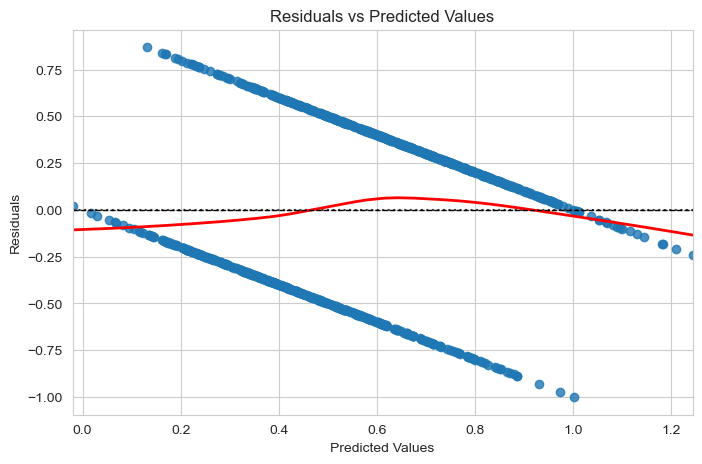

In [52]:
# Residual vs Predicted Values Plot (Linearity Check)
plt.figure(figsize=(8, 5))
sns.residplot(x=predictions, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 2})
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.show()

The plot shows a distinct curved pattern in the residuals (evident from the red line). This curved shape suggests that the relationship between the predictors and the response variable might not be strictly linear.

The residuals are not randomly scattered around 0 but instead form a "funnel" shape, which can indicate non-linearity or a problem with heteroscedasticity (non-constant variance of errors).

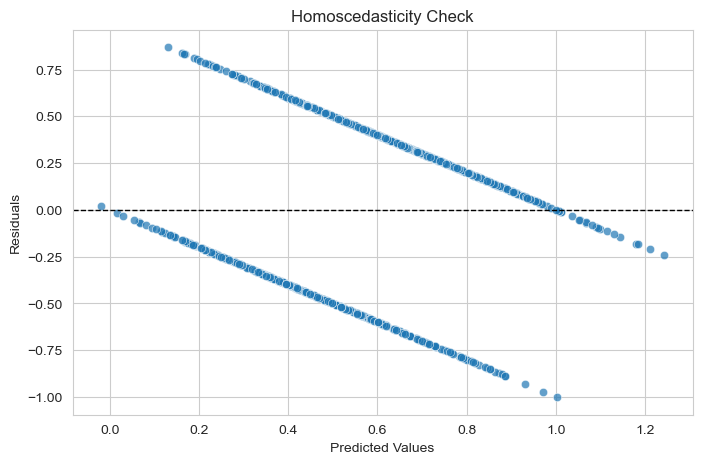

In [53]:
# Homoscedasticity Check Plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=predictions, y=residuals, alpha=0.7)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Homoscedasticity Check')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

The plot indicates heteroscedasticity, which means the model's errors have unequal variance. This can lead to inefficient estimates and may affect the validity of hypothesis tests and confidence intervals.

To address this issue, you might consider:
* Transforming the dependent variable (e.g., using a logarithmic or square root transformation).
* Using robust standard errors, which are less sensitive to heteroscedasticity.
* Weighted least squares regression to account for the changing variance.

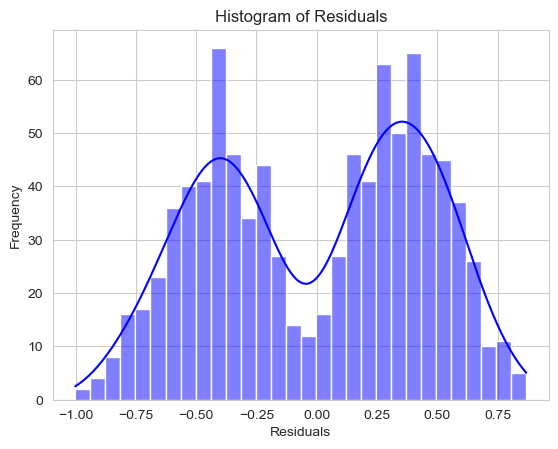

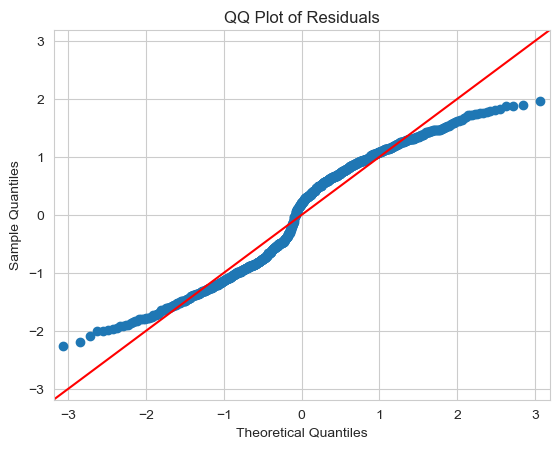

In [54]:
# Normality Check (Histogram)
sns.histplot(residuals, kde=True, bins=30, color='blue')
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Normality Check (QQ Plot)
sm.qqplot(residuals, line='45', fit=True)
plt.title('QQ Plot of Residuals')
plt.show()

The histogram shows a bimodal distribution, with two distinct peaks around -0.5 and 0.25. This indicates that the residuals are not normally distributed.

In a normally distributed set of residuals, you would expect a bell-shaped (unimodal) curve. However, the residuals here exhibit a multimodal pattern, which suggests potential issues with normality.

The Q-Q plot shows a noticeable deviation from the 45-degree red line, especially in the tails and center of the distribution. In a normal distribution, the residual points should closely follow the red line, indicating that the actual quantiles match the theoretical normal quantiles.

Both the histogram and Q-Q plot indicate that the residuals are not normally distributed. This violates the normality assumption of linear regression, which can affect the validity of confidence intervals and hypothesis test.

Consider transforming the dependent variable to make the residuals more normally distributed (e.g., logarithmic transformation or Box-Cox transformation).

Alternatively, non-parametric models or generalized linear models may be more appropriate if the normality assumption is difficult to achieve.

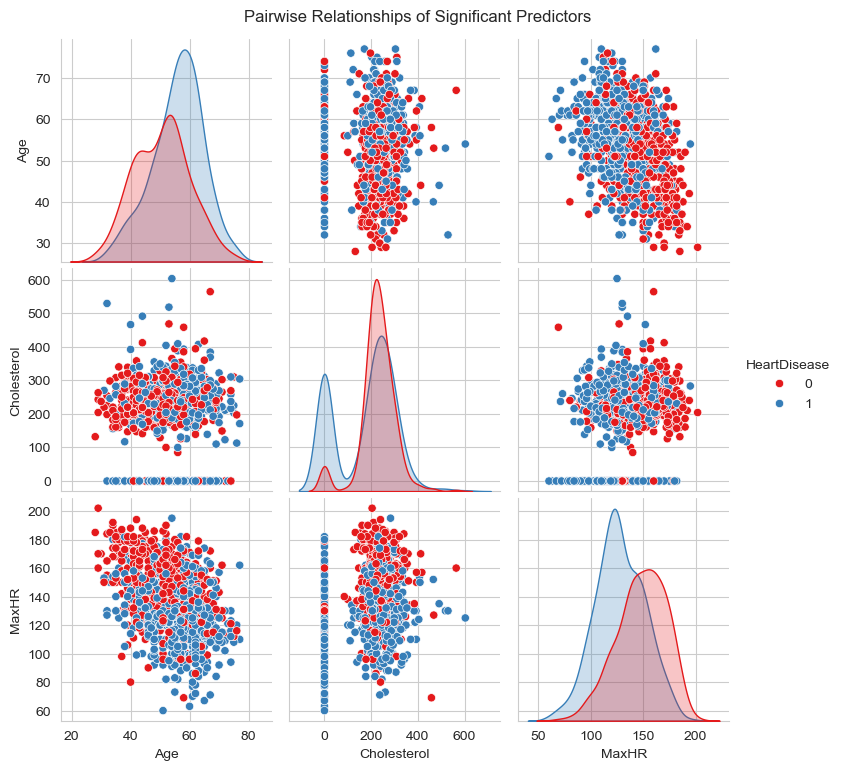

In [55]:
# Pairplot of Significant Predictors
sns.pairplot(heart_data, vars=['Age', 'Cholesterol', 'MaxHR'], hue='HeartDisease', palette='Set1', diag_kind='kde')
plt.suptitle('Pairwise Relationships of Significant Predictors', y=1.02)
plt.show()


Age and MaxHR appear to be stronger predictors of heart disease compared to Cholesterol, as there is more distinct separation between the two heart disease groups in these variables.

Cholesterol does not seem to clearly distinguish between the two groups, suggesting it may be a weaker predictor in this context.

## Conclusion

### F-statistic:
The F-statistic value is 34.00175, which measures the ratio of variance between the groups (males and females) to the variance within the groups. A larger F-statistic indicates a more significant difference between group means compared to the variability within the groups.

### p-value:
The p-value is 0.00000 (rounded), which is less than the common significance level of 0.05. This indicates that the probability of observing such a large F-statistic by random chance is extremely low, supporting the hypothesis that at least one predictor is significantly related to the target variable.

### R-squared:
The R-squared value is 0.203, which means that about 20.3% of the variability in the `HeartDisease` variable is explained by the predictors (Age, RestingBP, Cholesterol, MaxHR).

### Adjusted R-squared:
The adjusted R-squared value is 0.199, which accounts for the number of predictors in the model. This shows a slightly reduced explanatory power when adjusting for model complexity, suggesting the model might not be capturing all the underlying variability.

### F-statistic (Overall Model):
The F-statistic value of 57.97 with a p-value of 1.26e-43 indicates that the overall model is statistically significant, confirming that at least one predictor has a non-zero effect on the outcome variable.

---

### Residuals and Model Assumptions

1. **Residual vs Predicted Plot**:
   The plot shows a distinct curved pattern in the residuals, suggesting that the relationship between the predictors and the response variable might not be strictly linear. This indicates a potential violation of the linearity assumption.

2. **Homoscedasticity**:
   The residuals form a "funnel" shape in the residuals vs. predicted plot, which suggests heteroscedasticity (non-constant variance of errors). This can lead to inefficient estimates and affect the validity of hypothesis tests and confidence intervals.

   To address heteroscedasticity, the following approaches may be considered:
   - Transforming the dependent variable (e.g., logarithmic or square root transformation).
   - Using robust standard errors, which are less sensitive to heteroscedasticity.
   - Applying weighted least squares regression to account for the changing variance.

3. **Normality of Residuals**:
   The histogram of residuals shows a bimodal distribution, with two distinct peaks around -0.5 and 0.25, indicating that the residuals are not normally distributed. In a normal distribution, the residuals should ideally exhibit a bell-shaped curve (unimodal).

   The Q-Q plot further shows a noticeable deviation from the 45-degree red line, especially in the tails and center of the distribution. This suggests that the residuals do not follow a normal distribution, violating the normality assumption of linear regression. This can affect the validity of confidence intervals and hypothesis tests.

   **Recommendations**:
   - Consider transforming the dependent variable (e.g., logarithmic or Box-Cox transformation) to make the residuals more normally distributed.
   - Non-parametric models or generalized linear models could be more appropriate if the normality assumption remains difficult to satisfy.

---

### Predictor Analysis:
- **Age and MaxHR** appear to be stronger predictors of heart disease, as there is more distinct separation between the two heart disease groups in these variables.
- **Cholesterol**, on the other hand, does not show clear separation between the two groups, suggesting it may be a weaker predictor in this context.
